### Student Information
Name: TSAI-MU-FENG (蔡沐風)

Student ID: 113062628

GitHub ID: Arya0309

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

# Part 2

In [1]:
from datasets import load_dataset
import pandas as pd

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

X = pd.DataFrame(ds["train"])

X.head()

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...

In [2]:
# add category to the dataframe
X["category"] = X["sentiment"].apply(lambda x: 0 if x == "not nostalgia" else 1)

In [3]:
import helpers.data_mining_helpers as dmh

X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [4]:
sum(X.duplicated())

1

There is a duplicate data, since we have to observe the ratio between nostalgia and not nostalgia data and it is possible to have same comment, I don't think removing it here is a good idea.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

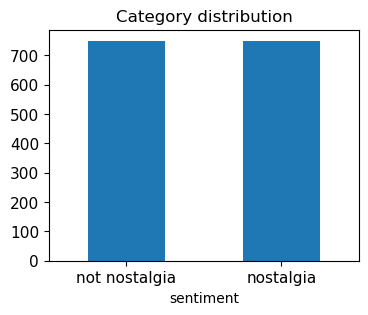

In [6]:
X.sentiment.value_counts().plot(
    kind="bar",
    title="Category distribution",
    rot=0,
    fontsize=11,
    figsize=(4, 3),
)

So now we know that the data size are the same.

In [7]:
import nltk

nltk.download("punkt")
nltk.download("punkt_tab")

X["unigrams"] = X["comment"].apply(lambda x: dmh.tokenize_text(x))

X[0:4]["unigrams"]

[nltk_data] Downloading package punkt to /home/arya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/arya/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [9]:
# first twenty features only
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [10]:
# obtain document index
plot_y = ["doc_" + str(i) for i in list(X.index)[0:20]]

In [11]:
plot_z = X_counts[0:20, 0:20].toarray()

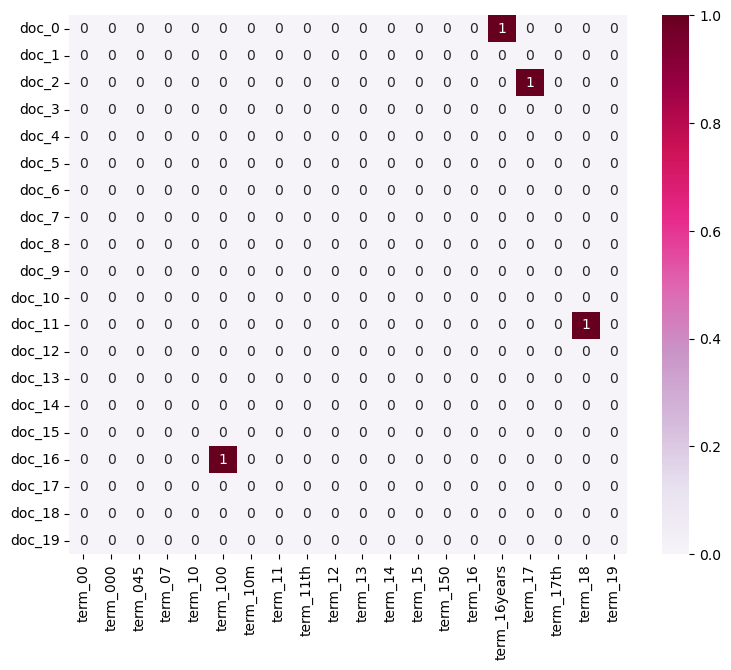

In [12]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

The dataset is too sparse, to have a better visulization, we have to do some preporcess.

In [13]:
import numpy as np

# sum up the counts of each vocabulary word (term frequency)
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [14]:
import seaborn as sns

plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["doc_" + str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20,].toarray()
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
# filter the dataframe to include only those terms with a frequency of at least 2
df = df_todraw.loc[:, (df_todraw >= 2).any(axis=0)]

plt.subplots(figsize=(40, 7))
ax = sns.heatmap(df, cmap="PuRd", vmin=0, vmax=3, annot=True)

It hard to gain some information from the heatmap, we will try bar chart.

In [15]:
import plotly.express as px

df = pd.DataFrame(
    {"term": count_vect.get_feature_names_out(), "frequency": term_frequencies}
)
df = df.sort_values(by="frequency", ascending=False)
fig = px.bar(df, x="term", y="frequency")
fig.show()

It's still quit hard to view some meaningful information.

In [16]:
import plotly.express as px

df = pd.DataFrame(
    {"term": count_vect.get_feature_names_out(), "frequency": term_frequencies}
)
df = df.sort_values(by="frequency", ascending=False)
df = df[:40]
df = df[df["frequency"] > 0]
fig = px.bar(df, x="term", y="frequency")
fig.show()

The most frequent words in commets are (excluding stopwords): like, love, nostalgia, one, good, video, time, song, memories, childhood, remember, back, watching, old, still, years, people, music, miss, great, etc.

In [17]:
import plotly.express as px

df = pd.DataFrame(
    {"term": count_vect.get_feature_names_out(), "frequency": term_frequencies}
)
df = df.sort_values(by="frequency", ascending=True)
df = df[:100]
df = df[df["frequency"] > 0]
fig = px.bar(df, x="term", y="frequency")
fig.show()

For low frequency terms, it is hard to tell because there are too many terms with frequency 1. We can remove them by setting a threshold. But first, we have to see the distribution of other low frequency terms.

In [18]:
import plotly.express as px

df = pd.DataFrame(
    {"term": count_vect.get_feature_names_out(), "frequency": term_frequencies}
)
df = df.sort_values(by="frequency", ascending=True)
df = df[df["frequency"] > 1]
df = df[:100]
fig = px.bar(df, x="term", y="frequency")
fig.show()

Is still hard to tell. Let's try list the amount of different frequencies.

In [19]:
total_terms = len(count_vect.get_feature_names_out())
print(f"Total number of terms: {total_terms}")

Total number of terms: 3730


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

select_range = 50
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
frequency_count = []

for i in range(select_range):
    frequency_count.append(sum(term_frequencies == i + 1))

frequency_count = pd.DataFrame(frequency_count)

plt.figure(figsize=(10, 6))
plt.bar(
    range(
        1, select_range + 1
    ),  # Adjust the range to match the length of frequency_count
    frequency_count[0],
    alpha=0.7,
)
plt.xlabel("Frequency")
plt.ylabel("Number of terms")
plt.title("Frequency distribution of terms")
plt.grid(True, axis="y")  # Only show gridlines for the y-axis
plt.show()

Since it is hard to visualize the distribution of term frequencies, we can use a log scale and only view those have frequency bigger than 2.

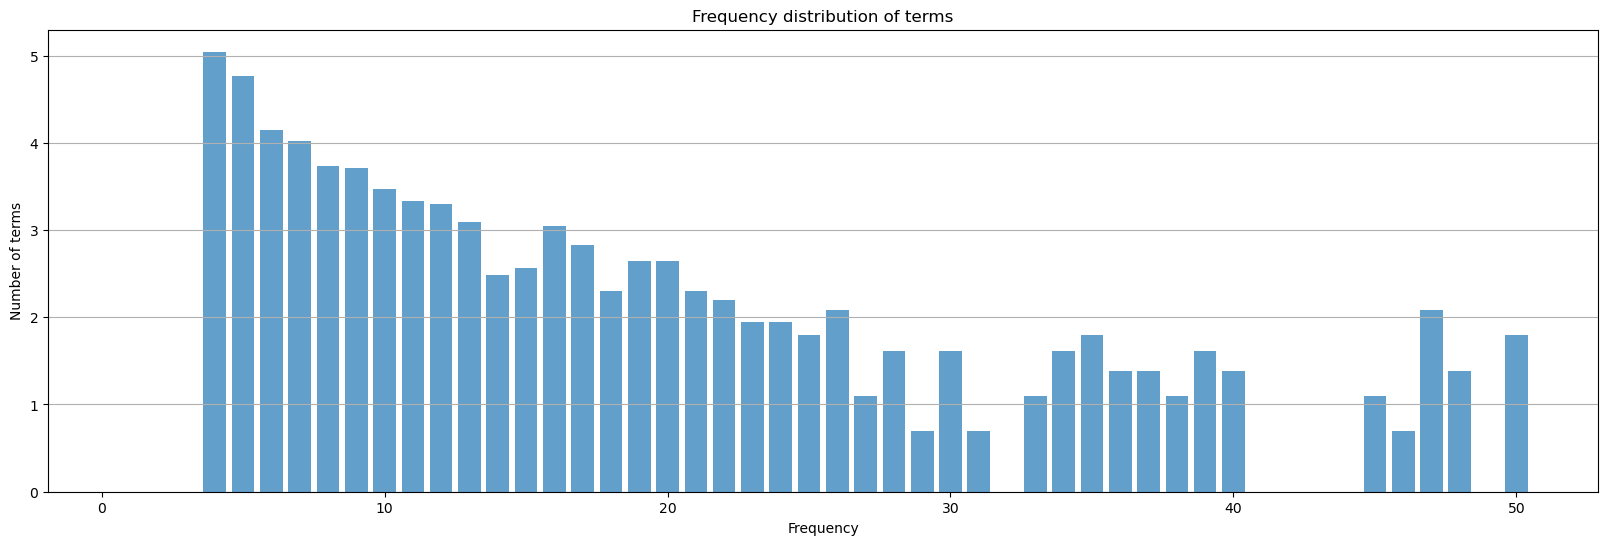

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

select_range = 50
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
frequency_count = []

for i in range(select_range):
    frequency_count.append(sum(term_frequencies == i + 1))

frequency_count = pd.DataFrame(frequency_count)
frequency_count["log"] = frequency_count[0].apply(lambda x: math.log(x) if x > 0 else 0)
frequency_count["log_limit"] = [
    x if idx > 2 else 0 for idx, x in enumerate(frequency_count["log"])
]

plt.figure(figsize=(20, 6))
plt.bar(
    range(
        1, select_range + 1
    ),  # Adjust the range to match the length of frequency_count
    frequency_count["log_limit"],
    alpha=0.7,
)
plt.xlabel("Frequency")
plt.ylabel("Number of terms")
plt.title("Frequency distribution of terms")
plt.grid(True, axis="y")  # Only show gridlines for the y-axis
plt.show()

In [22]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
sum_tf = sum(term_frequencies)
sum_tfl = sum(term_frequencies[term_frequencies <= 5])
print(f"The percentage of low frequency terms: {sum_tfl/sum_tf}")

The percentage of low frequency terms: 0.14081518704634283


By the log scale, we can estimate that those apear lesser than 5 times (around 15%) are low frequency terms. So we will remove half of them.

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category
categories = X["sentiment"].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X["sentiment"] == category].copy()


# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(
        df["comment"]
    )  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df


# Create term-document frequency DataFrames for each category
filt_term_document_dfs = (
    {}
)  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [24]:
def filter_top_bottom_words_by_sum(
    term_document_df, top_percent=0.01, bottom_percent=0.07
):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat(
        [sorted_words.head(bottom_n), sorted_words.tail(top_n)]
    ).index
    print(
        f"Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}"
    )  # Here we print which words correspond to the bottom percentage we filter
    print(
        f"Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}"
    )  # Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)


# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f"\nFor category {category} we filter the following words:")
    term_document_dfs[category] = filter_top_bottom_words_by_sum(
        filt_term_document_dfs[category]
    )


For category not nostalgia we filter the following words:
Bottom 7.000000000000001% words: 
1970           1
1973           1
1981           1
1987           1
1989           1
              ..
association    1
assume         1
assured        1
attack         1
attempts       1
Length: 182, dtype: int64
Top 1.0% words: 
what      94
all       98
great    103
with     106
he       108
but      113
like     115
one      117
have     119
so       136
for      138
was      152
music    160
love     165
my       199
that     210
you      238
in       263
is       265
it       268
song     309
of       361
to       394
and      451
this     453
the      708
dtype: int64

For category nostalgia we filter the following words:
Bottom 7.000000000000001% words: 
1964         1
1969         1
1975         1
1980s        1
1981         1
            ..
utterly      1
vacation     1
vacuum       1
valentine    1
value        1
Length: 160, dtype: int64
Top 1.0% words: 
you         129
time        1

Database size (total no of transactions) : 750
Number of items : 2113
Minimum Transaction Size : 1
Average Transaction Size : 14.569333333333333
Maximum Transaction Size : 56
Standard Deviation Transaction Size : 10.373292287836533
Variance in Transaction Sizes : 107.7488580329328
Sparsity : 0.9931049061366146


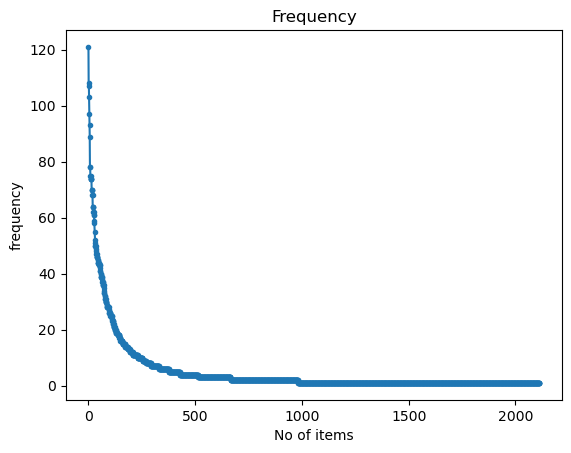

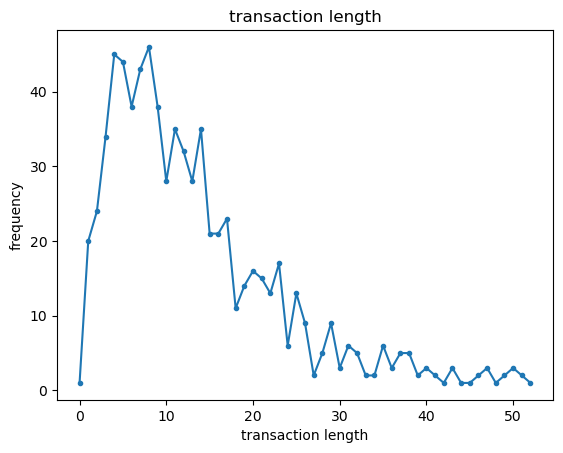

In [26]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase("td_freq_db_nostalgia.csv")

obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 750
Number of items : 2394
Minimum Transaction Size : 3
Average Transaction Size : 13.909333333333333
Maximum Transaction Size : 58
Standard Deviation Transaction Size : 7.995818462727183
Variance in Transaction Sizes : 64.01847085002225
Sparsity : 0.9941899192425508


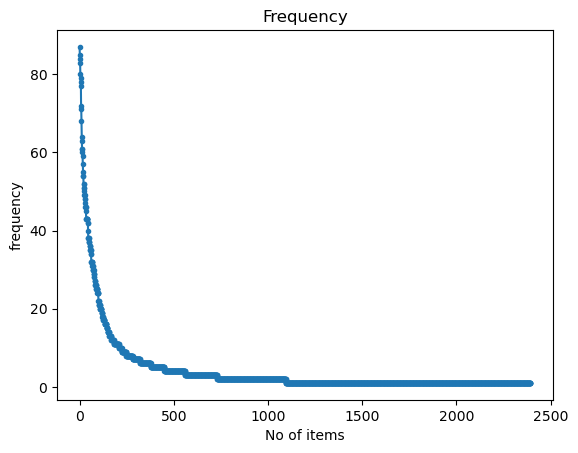

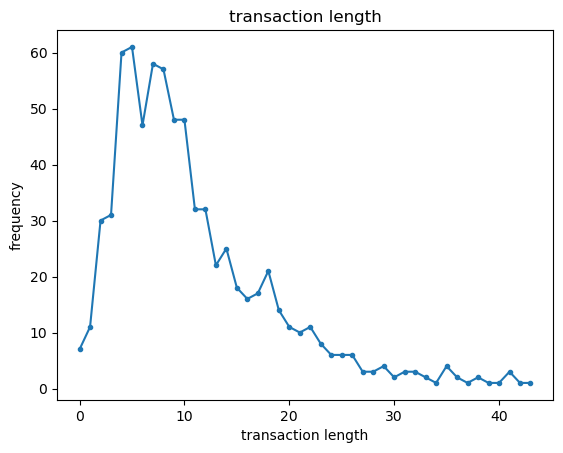

In [27]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase("td_freq_db_not nostalgia.csv")
obj.run()
obj.printStats()
obj.plotGraphs()

In [28]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
obj1 = alg.FPGrowth(iFile="td_freq_db_nostalgia.csv", minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia = obj1.getPatternsAsDataFrame()
print("Total No of patterns: " + str(len(frequentPatternsDF_nostalgia)))
print("Runtime: " + str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 757
Runtime: 0.05131411552429199


In [29]:
obj1.save("freq_patterns_nostalgia_minSup9.txt")
frequentPatternsDF_nostalgia

Patterns  Support
0             find        9
1             down        9
2              few        9
3              its        9
4             sure        9
..             ...      ...
752       with old       20
753  with remember       26
754            old      108
755   old remember       23
756       remember      121

[757 rows x 2 columns]

In [30]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
obj2 = alg.FPGrowth(iFile="td_freq_db_not nostalgia.csv", minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia = obj2.getPatternsAsDataFrame()
print("Total No of patterns: " + str(len(frequentPatternsDF_not_nostalgia)))
print("Runtime: " + str(obj2.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 384
Runtime: 0.03779315948486328


In [31]:
obj2.save("freq_patterns_not_nostalgia_minSup9.txt")
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
379         on       84
380     on not       10
381     on can       11
382        can       85
383        not       87

[384 rows x 2 columns]

In [32]:
import pandas as pd

# We group together all of the dataframes related to our found patterns
dfs = [
    frequentPatternsDF_not_nostalgia,
    frequentPatternsDF_nostalgia,
]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df["Patterns"]:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df["Patterns"].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by="Support", ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
794   remember      121
790       with      107
788     brings      103
783         is       97
777      great       93
..         ...      ...
4       family        9
3         mind        9
2         soul        9
1      special        9
0    favorites        9

[795 rows x 2 columns]
Number of patterns discarded: 346


In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X["comment"])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X["tokenized_text"] = X["comment"].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df["Patterns"])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df["Patterns"]:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X["tokenized_text"].apply(
        lambda x: 1 if pattern_words.issubset(x) else 0
    )

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  please  pure  others  \
0      0    0    0   0   0    0    0   0     0   0  ...       0     0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0     0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0     0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0     0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0     0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...   ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0     0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0     0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0     0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0     0       1   
1499   0    0    0   0   0    0    0   0     0   0  ...       0     0       0   

      things  ones  family  mind  soul  special  favorites  
0          0     0       0     0     0        0          0  
1          0     0       0     0     0        0          0  
2          0     0       0     0     0        0          0  
3          0     0       0     0     0        0          0  
4          0     0       0     0     0        0          0  
...      ...   ...     ...   ...   ...      ...        ...  
1495       0     0       0     0     0        0          0  
1496       0     0       0     0     0        0          0  
1497       0     0       0     0     0        0          0  
1498       0     0       0     0     0        0          0  
1499       0     0       0     0     0        0          0  

[1500 rows x 4525 columns]

In [34]:
# Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

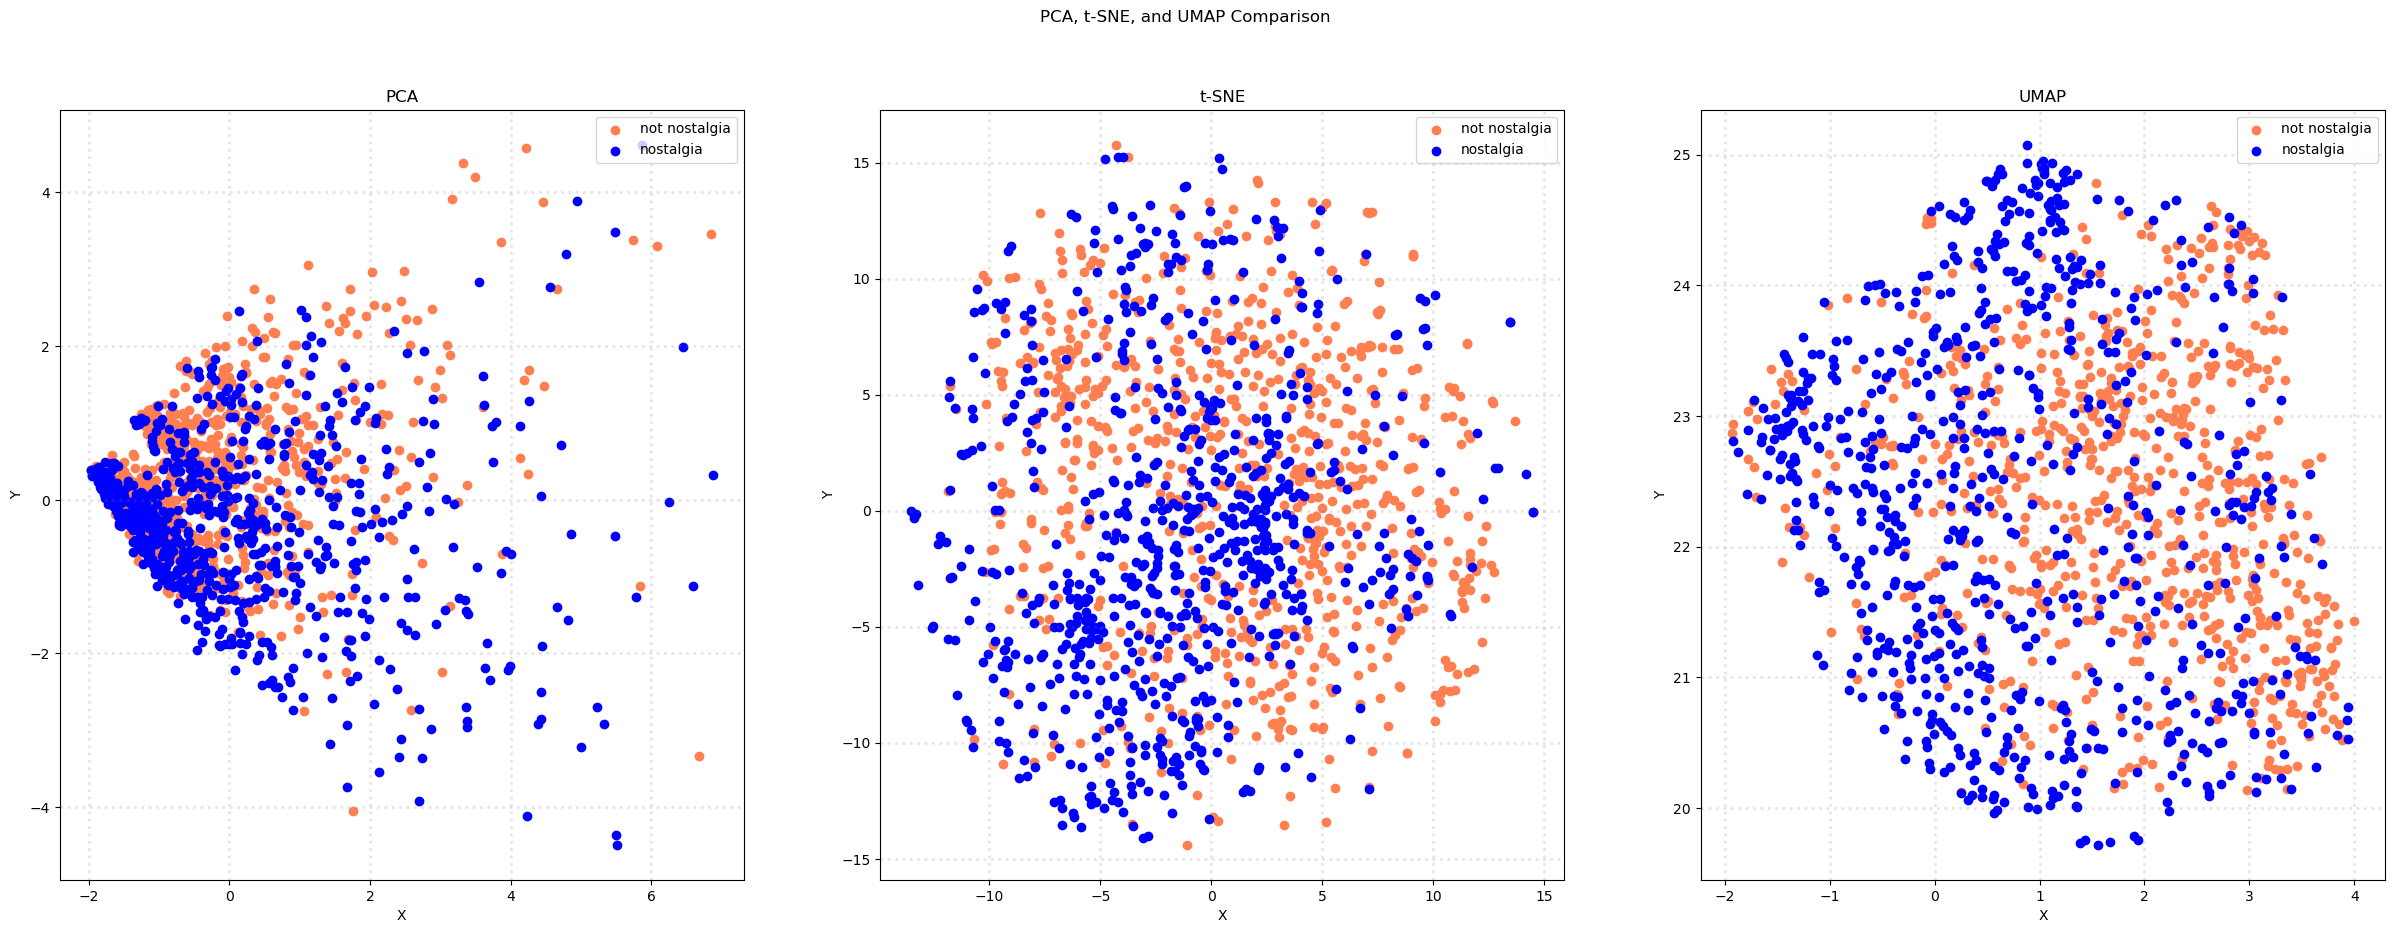

In [35]:
# Plot the results in subplots
col = ["coral", "blue", "black", "orange"]
categories = X["sentiment"].unique()

fig, axes = plt.subplots(
    1, 3, figsize=(30, 10)
)  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle("PCA, t-SNE, and UMAP Comparison")


# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X["sentiment"] == category].T[0]
        ys = X_reduced[X["sentiment"] == category].T[1]
        ax.scatter(xs, ys, c=c, marker="o", label=category)

    ax.grid(color="gray", linestyle=":", linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend(loc="upper right")


# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, "PCA")
plot_scatter(axes[1], X_tsne_tdm, "t-SNE")
plot_scatter(axes[2], X_umap_tdm, "UMAP")

plt.show()

In [36]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

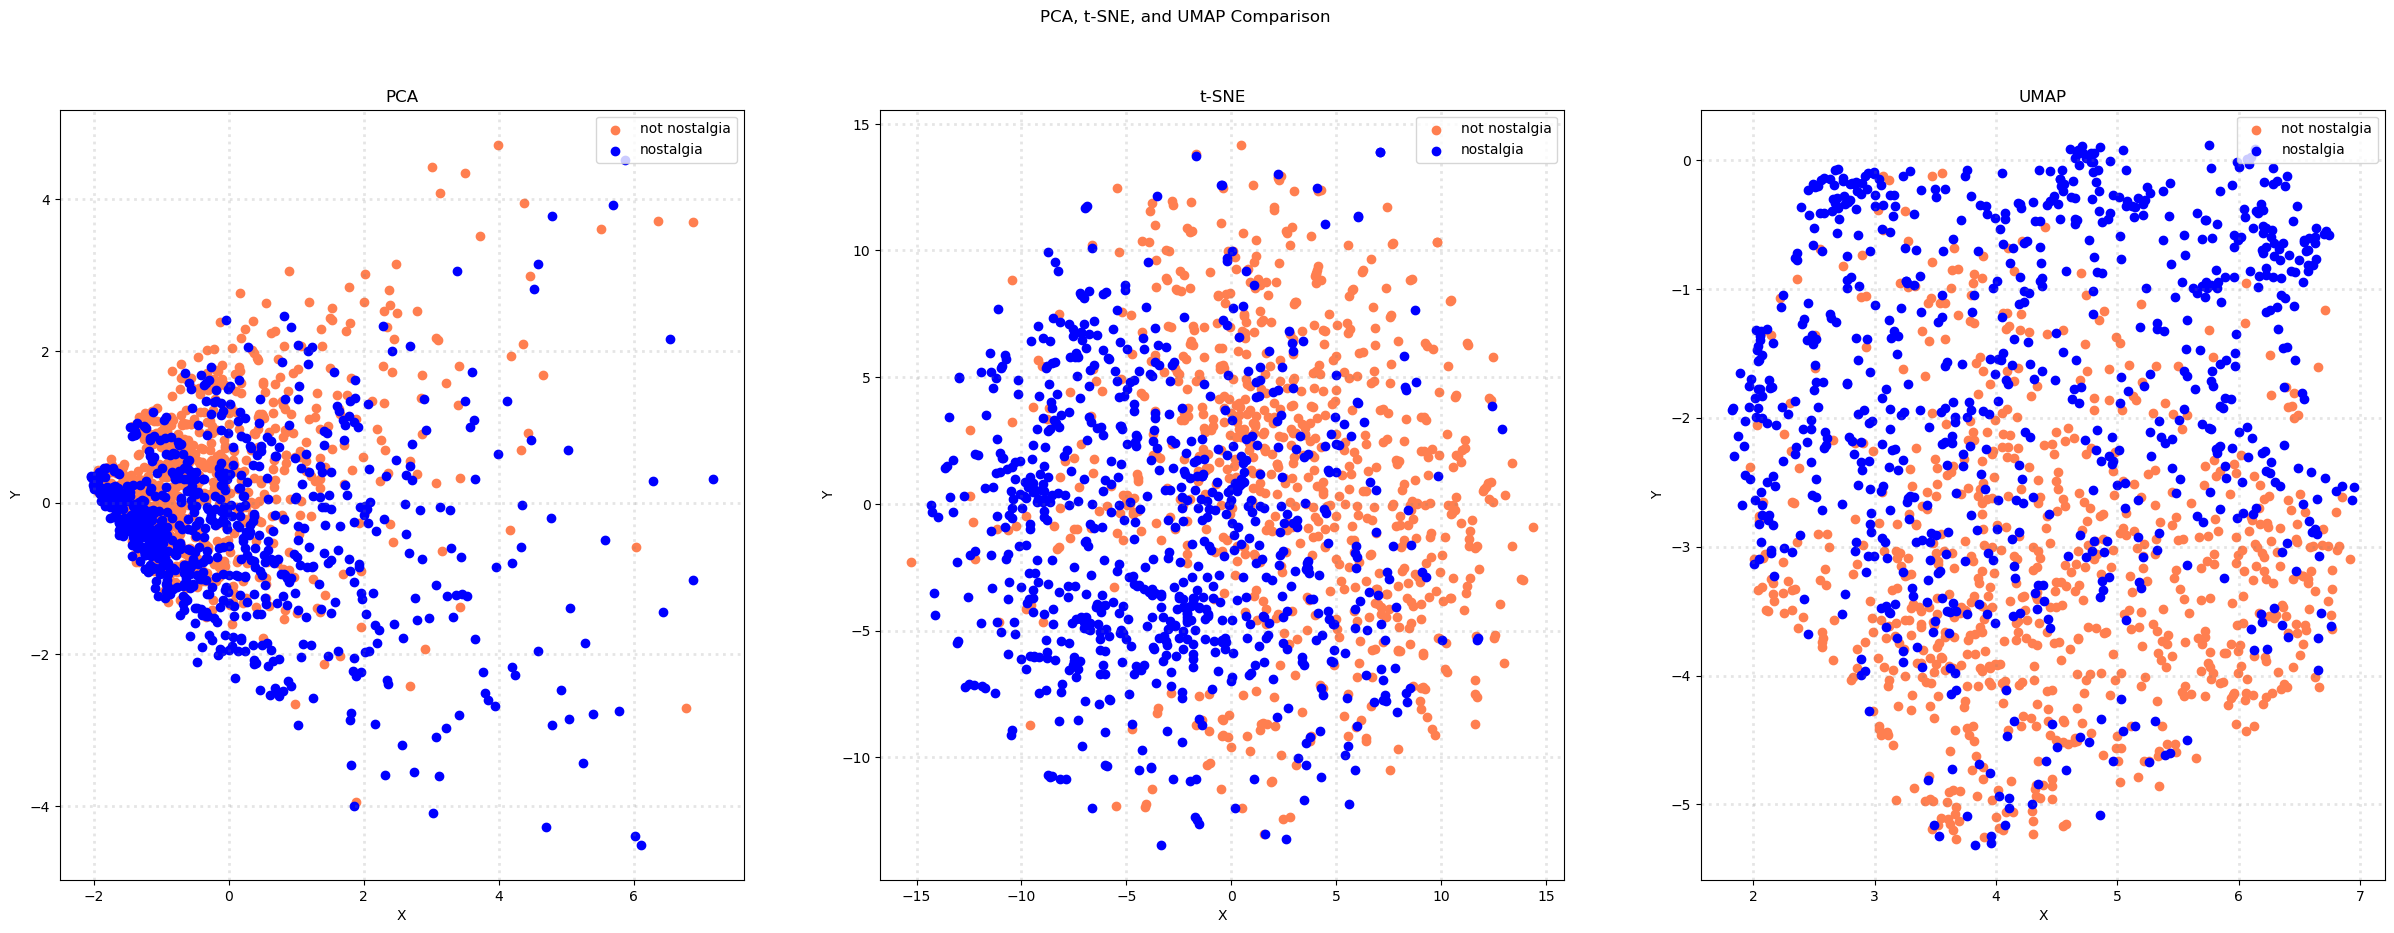

In [37]:
col = ["coral", "blue", "black", "orange"]
categories = X["sentiment"].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle("PCA, t-SNE, and UMAP Comparison")


def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X["sentiment"] == category].T[0]
        ys = X_reduced[X["sentiment"] == category].T[1]
        ax.scatter(xs, ys, c=c, marker="o", label=category)

    ax.grid(color="gray", linestyle=":", linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend(loc="upper right")


plot_scatter(axes[0], X_pca_aug, "PCA")
plot_scatter(axes[1], X_tsne_aug, "t-SNE")
plot_scatter(axes[2], X_umap_aug, "UMAP")

plt.show()

In [38]:
# Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[["category", "sentiment"]].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    tdm_df, X["category"], test_size=0.3, random_state=42
)

In [39]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, target_names=target_names, digits=4),
)

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9140    0.7556    0.8273       225
    nostalgia     0.7917    0.9289    0.8548       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [40]:
# Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[["category", "sentiment"]].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    augmented_df, X["category"], test_size=0.3, random_state=42
)

In [41]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, target_names=target_names, digits=4),
)

Accuracy: 0.88

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9171    0.8356    0.8744       225
    nostalgia     0.8490    0.9244    0.8851       225

     accuracy                         0.8800       450
    macro avg     0.8830    0.8800    0.8798       450
 weighted avg     0.8830    0.8800    0.8798       450



# Part 3

In [42]:
import pandas as pd
import helpers.data_mining_helpers as dmh
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [43]:
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

X = pd.DataFrame(ds["train"])
X = X.dropna(subset=["comment"])

In [44]:
# Use TF-IDF features with naive classifier
vectorizer = TfidfVectorizer(
    tokenizer=dmh.tokenize_text,
    stop_words="english",
    max_features=2000,
)

X_tfidf = vectorizer.fit_transform(X["comment"])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

y = X["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf_df, y, test_size=0.2, random_state=42
)

/home/arya/micromamba/envs/dmlab1_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



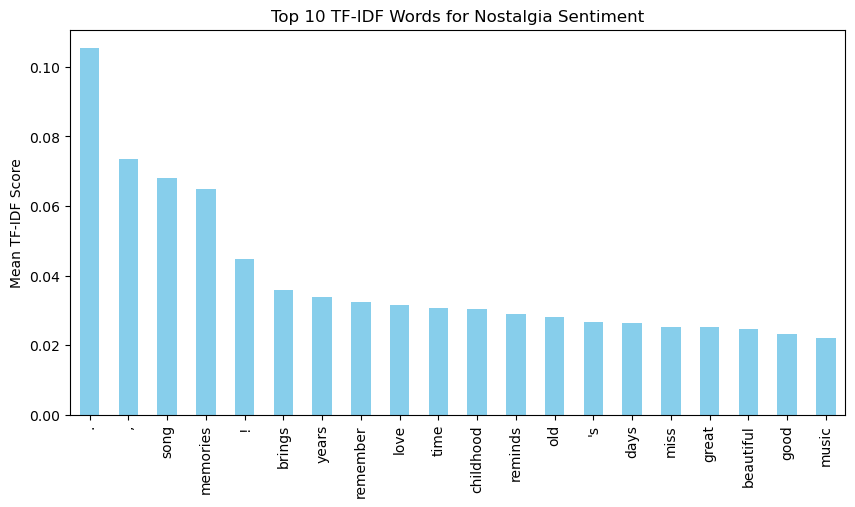

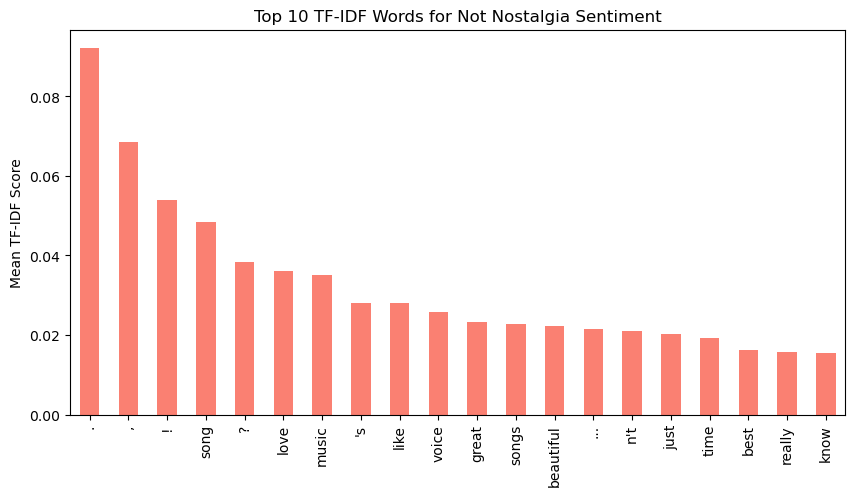

In [48]:
nostalgia_df = X_tfidf_df[y == "nostalgia"]
not_nostalgia_df = X_tfidf_df[y == "not nostalgia"]

# Calculate mean TF-IDF scores for each word in each class
nostalgia_mean_tfidf = nostalgia_df.mean().sort_values(ascending=False)
not_nostalgia_mean_tfidf = not_nostalgia_df.mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
nostalgia_mean_tfidf.head(20).plot(kind="bar", color="skyblue")
plt.title("Top 10 TF-IDF Words for Nostalgia Sentiment")
plt.ylabel("Mean TF-IDF Score")
plt.show()

plt.figure(figsize=(10, 5))
not_nostalgia_mean_tfidf.head(20).plot(kind="bar", color="salmon")
plt.title("Top 10 TF-IDF Words for Not Nostalgia Sentiment")
plt.ylabel("Mean TF-IDF Score")
plt.show()

In [49]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("TF-IDF Naive Bayes Accuracy: {:.4f}%".format(accuracy * 100))

TF-IDF Naive Bayes Accuracy: 81.3333%


In [50]:
# Use CountVectorizer features with naive classifier
count_vectorizer = CountVectorizer(
    # tokenizer=dmh.tokenize_text,
    stop_words="english",
    max_features=2000,
)

X_count = count_vectorizer.fit_transform(X["comment"])
X_count_df = pd.DataFrame(
    X_count.toarray(), columns=count_vectorizer.get_feature_names_out()
)

In [51]:
X_train_count, X_test_count, y_train, y_test = train_test_split(
    X_count_df, y, test_size=0.2, random_state=42
)

nb_classifier_count = MultinomialNB()
nb_classifier_count.fit(X_train_count, y_train)

y_pred_count = nb_classifier_count.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)
print("Word Frequency Naive Bayes Accuracy: {:.4f}%".format(accuracy_count * 100))

Word Frequency Naive Bayes Accuracy: 81.6667%


# Part 4

Firstly, when using a naive Bayes classifier with TF-IDF features, I noticed that tokenization actually led to a slight decrease in overall accuracy, which was surprising. This might be related to potential limitations with the NLTK tokenizer or other factors affecting the tokenization process.

Secondly, I believe lemmatizing tokens could enhance data preprocessing, as there’s no advantage in keeping separate entries for words like 'love' and 'loved' in the vocabulary. By lemmatizing, we can focus more on the core meanings of words while also reducing sparsity in the dataset.

Lastly, in both the original and newly preprocessed datasets, the most frequent terms are typically stop words. I think retaining around 0.5% of these will reduce the impact of stop words while preserving some information that could still be valuable.